<a href="https://colab.research.google.com/github/IlyaNechaev27/DS_project/blob/main/plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Индивидуальный проект: **Police shootings in USA** \
Автор: **Нечаев Илья Андреевич** \
Проверяющий: **Куготов Алим Заурович**

### **План выполнения индивидуального проекта**
1. Описание набора данных и решаемая задача
2. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
3. Генерация и селекция признаков + нормализация
4. Исключение аномалий, заполнение пропусков в данных и.т.д.
5. Очистка данных от шума
6. Выбор метода/алгоритма, модели, архитектуры (для НС)
7. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма
8. Выбор метрики оценки качества (RMSE, R^2)
9. Генерация наборов для обучения, тестирования и валидации
10. Развертывание и работа модели, визуализация результатов
11. Выводы

## Описание набора данных и решаемая задача

### Задача
**Проанализировать и выявить закономерности в случаях прменения огнестрельного оружия полицейскими в Америке**

- Интересно выявить тип людей, наиболее подверженных угрозе применения огнестрельного оружия;
- В каких штатах стреляют чаще всего?
- Увеличивается ли с каждым годом количество прицедентов использования оружия полицейскими?

### Описание данных

Данные взяты из: 

[Ссылка на kaggle датасет](https://www.kaggle.com/datasets/ahsen1330/us-police-shootings)


In [2]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
!git clone https://github.com/IlyaNechaev27/DS_project.git

Cloning into 'DS_project'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17 (delta 5), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [4]:
df = pd.read_csv("DS_project/data/shootings.csv")


Проверим, все ли нормально считалось – посмотрим на первые 5 строк

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
print(df.shape)

(4895, 15)


- Выборка включает **4895** записей.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

Описание признаков

|  Название  | Описание | Тип |
|---         |--:       |     |
| **id** | идентификтор | количественный |
| **name** | Имя застреленного человека | строковой |
| **date** | Дата события | дата, yyyy-mm-dd format  |
| **manner_of_death** | Каким способом было произведено убийство | строковой |
| **armed** | Вооружение | строковый |
| **age** | Возраст расстрелянного человека | количественный |
| **gender** | Пол расстрелянного человека | качественный
| **race** | Расса растрялянного человека | строковый
| **city** | Город происшествия | строковой |
| **state** |  Штат происшествия | строковой |
| **signs_of_mental_illness** | Признаки психический заболеваний | бинарный |
| **threat_level** | Уровень угрозы | строковой |
| **flee** | Как пыталась скрыться жертва | строковой
| **body_camera** | Наличие видеокамеры, заснявшей происшествие | бинарный |
| **arms_category** | Категория орежия | строковой |

Целевая переменная: **Race** – раса убитого полицией человека, строкой. Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым. 


## Первичный и визуальный анализ данных

- выгрузка данных
- основные харакетристики переменных в численном и визуальном представлении
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- обработка пропусков в данных
- выявление и удаление выбросов и шума в данных

In [8]:
df['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

Text(0.5, 1.0, 'Распределений по расам людей, убитых полицией')

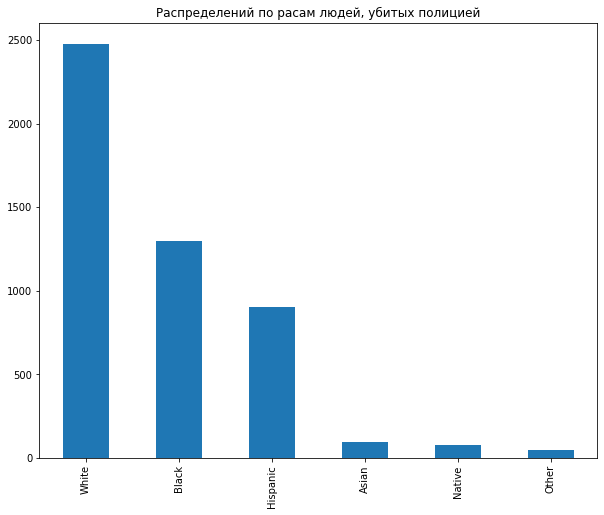

In [9]:
df['race'].value_counts().plot(kind='bar', label='race')
plt.title("Распределений по расам людей, убитых полицией")

По графику можно заметить, что людей белой расы убивают чаще. Но если обратиться к википедии и узнать какое процентное соотношение рас в Америке, можно сделать вывод - чернокожего человека с большей вероятностью застрелят, чем белого. На этом можно закончить анализ датасета, но это не по-самурайски, поэтому двигаемся дальше)

Text(0.5, 1.0, 'Распределений по полу')

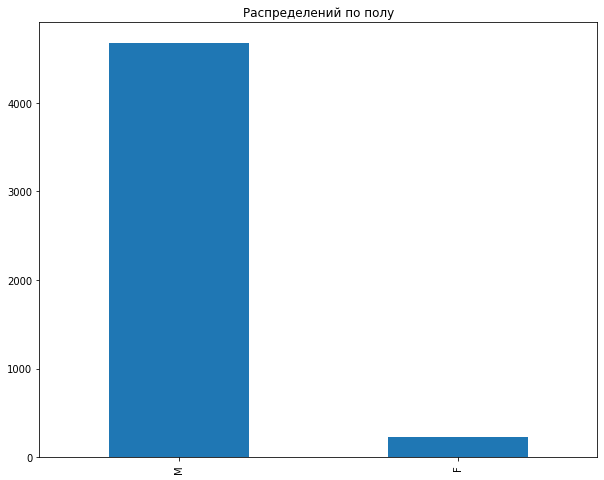

In [10]:
df['gender'].value_counts().plot(kind='bar', label='race')
plt.title("Распределений по полу")

**men moment**

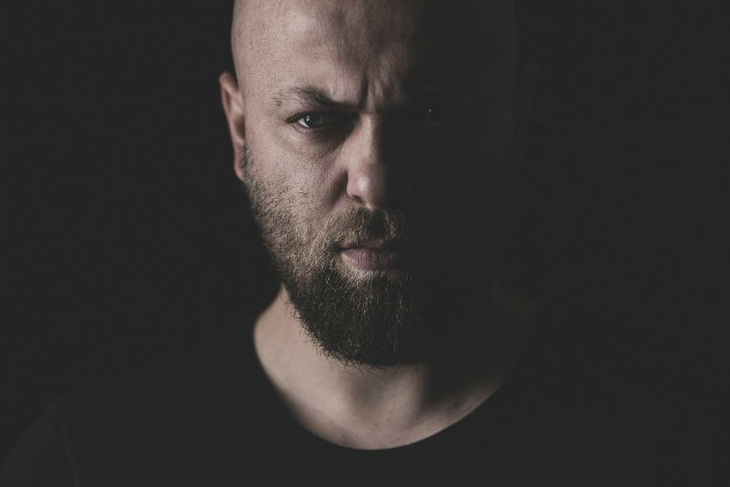

In [11]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

**Преобразуем коды штатов в полные названия:**

In [12]:
def state(x):
    if x=='AL':
        return('Alabama')
    elif x=='AK':
        return('Alaska')
    elif x=='AZ':
        return('Arizona')
    elif x=='AR':
        return('Arkansas')
    elif x=='AZ':
        return('Arizona')
    elif x=='CA':
        return('California')
    elif x=='CO':
        return('Colorado')
    elif x=='CT':
        return('Connecticut')
    elif x=='DE':
        return('Delaware')
    elif x=='FL':
        return('Florida')
    elif x=='GE':
        return('Georgia')
    elif x=='HI':
        return('Hawaii')
    elif x=='FL':
        return('Idaho')
    elif x=='IL':
        return('Illinois')
    elif x=='IN':
        return('Indiana')
    elif x=='IA':
        return('Iowa')
    elif x=='KS':
        return('Kansas')
    elif x=='KY':
        return('Kentucky')
    elif x=='LA':
        return('Louisiana')
    elif x=='ME':
        return('Maine')
    elif x=='MD':
        return('Maryland')
    elif x=='MA':
        return('Massachusetts')
    elif x=='MI':
        return('Michigan')
    elif x=='MN':
        return('Minnesota')
    elif x=='MS':
        return('Mississippi')
    elif x=='MO':
        return('Missouri')
    elif x=='MT':
        return('Montana')
    elif x=='NE':
        return('Nebraska')
    elif x=='NV':
        return('Nevada')
    elif x=='NH':
        return('New Hampshire')
    elif x=='NJ':
        return('New Jersey')
    elif x=='NM':
        return('New Mexico')
    elif x=='NY':
        return('New York')
    elif x=='NC':
        return('North Carolina')
    elif x=='ND':
        return('North Dakota')
    elif x=='OH':
        return('Ohio')
    elif x=='OK':
        return('Oklahoma')
    elif x=='OR':
        return('Oregon')
    elif x=='PA':
        return('Pennsylvania')
    elif x=='RI':
        return('Rhode Island')
    elif x=='SC':
        return('South Carolina')
    elif x=='SD':
        return('South Dakota')
    elif x=='TN':
        return('Tennessee')
    elif x=='TX':
        return('Texas')
    elif x=='UT':
        return('Utah')
    elif x=='VT':
        return('Vermont')
    elif x=='VA':
        return('Virginia')
    elif x=='WA':
        return('Washington')
    elif x=='WV':
        return('West Virginia')
    elif x=='WI':
        return('Wisconsin')
    else:
        return('Wyoming')

df['state'] = df['state'].apply(state)
df['state'].unique()

array(['Washington', 'Oregon', 'Kansas', 'California', 'Colorado',
       'Oklahoma', 'Arizona', 'Iowa', 'Pennsylvania', 'Texas', 'Ohio',
       'Louisiana', 'Montana', 'Utah', 'Arkansas', 'Illinois', 'Nevada',
       'New Mexico', 'Minnesota', 'Missouri', 'Virginia', 'New Jersey',
       'Indiana', 'Kentucky', 'Massachusetts', 'New Hampshire', 'Florida',
       'Wyoming', 'Maryland', 'Nebraska', 'Michigan', 'Tennessee',
       'North Carolina', 'Alaska', 'New York', 'Maine', 'Alabama',
       'Mississippi', 'Wisconsin', 'South Carolina', 'Delaware',
       'West Virginia', 'Hawaii', 'North Dakota', 'Connecticut',
       'South Dakota', 'Vermont', 'Rhode Island'], dtype=object)

**Добавим в таблицу новый столбец, обзначающий регион, в котором было совершено убийство**

---



In [13]:
def Region(x):
    if x=='Alabama':
        return('south')
    elif x=='Alaska':
        return('west')
    elif x=='Arizona':
        return('west')
    elif x=='Arkansas':
        return('south')
    elif x=='California':
        return('west')
    elif x=='Colorado':
        return('west')
    elif x=='Connecticut':
        return('northeast')
    elif x=='Delaware':
        return('south')
    elif x=='Florida':
        return('south')
    elif x=='Georgia':
        return('south')
    elif x=='Hawaii':
        return('west')
    elif x=='Idaho':
        return('west')
    elif x=='Illinois':
        return('Midwest')
    elif x=='Indiana':
        return('Midwest')
    elif x=='Iowa':
        return('Midwest')
    elif x=='Kansas':
        return('Midwest')
    elif x=='Kentucky':
        return('south')
    elif x=='Louisiana':
        return('south')
    elif x=='Maine':
        return('northeast')
    elif x=='Maryland':
        return('south')
    elif x=='Massachusetts':
        return('northeast')
    elif x=='Michigan':
        return('Midwest')
    elif x=='Minnesota':
        return('Midwest')
    elif x=='Mississippi':
        return('south')
    elif x=='Missouri':
        return('Midwest')
    elif x=='Montana':
        return('west')
    elif x=='Nebraska':
        return('Midwest')
    elif x=='Nevada':
        return('west')
    elif x=='New Hampshire':
        return('northeast')
    elif x=='New Jersey':
        return('northeast')
    elif x=='New Mexico':
        return('west')
    elif x=='New York':
        return('northeast')
    elif x=='North Carolina':
        return('south')
    elif x=='North Dakota':
        return('Midwest')
    elif x=='Ohio':
        return('Midwest')
    elif x=='Oklahoma':
        return('south')
    elif x=='Oregon':
        return('west')
    elif x=='Pennsylvania':
        return('northeast')
    elif x=='Rhode Island':
        return('northeast')
    elif x=='South Carolina':
        return('south')
    elif x=='South Dakota':
        return('Midwest')
    elif x=='Tennessee':
        return('south')
    elif x=='Texas':
        return('south')
    elif x=='Utah':
        return('west')
    elif x=='Vermont':
        return('northeast')
    elif x=='Virginia':
        return('south')
    elif x=='Washington':
        return('west')
    elif x=='West Virginia':
        return('south')
    elif x=='Wisconsin':
        return('Midwest')
    elif x=='Wyoming':
        return('west')
df['region']=df['state'].apply(Region)
df['region'].unique()    

array(['west', 'Midwest', 'south', 'northeast'], dtype=object)

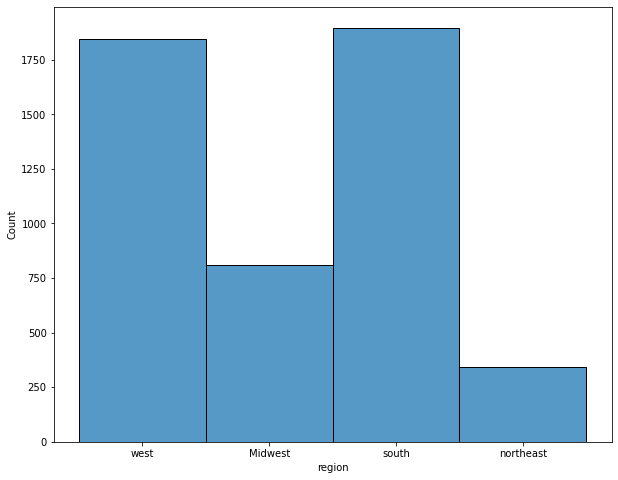

In [14]:
sns.histplot(df['region'])

In [15]:
df['region'].isnull().sum()

0

In [16]:
df['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [17]:
df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

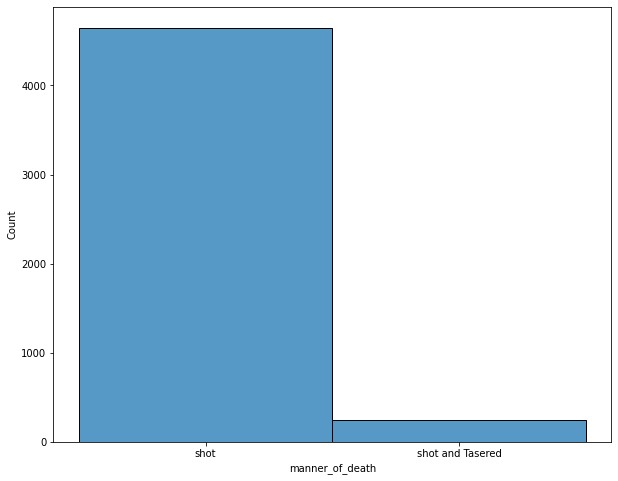

In [18]:
sns.histplot(df['manner_of_death'])

In [19]:
df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

**Добави новые столбы в таблицу: год, месяц, день, квартал, неделя.**

In [23]:
def year(x):
    return x.split('-')[0]

def month(x):
  return x.split('-')[1]

def day(x):
    return x.split('-')[2]

def quarter(x):
    if x <= 3:
        return(1)
    elif x <=6:
        return(2)
    elif x <= 9:
        return(3)
    else:
        return(4) 

df['year'] = df['date'].apply(year)
df['month'] = df['date'].apply(month).astype(int)
df['day'] = df['date'].apply(day).astype(int)
df['quarter'] = df['month'].apply(quarter)
df['week']=(((((df['month']-1)*30)+df['day'])/7)+1).astype(int)

df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,region,year,month,day,quarter,week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,True,attack,Not fleeing,False,Guns,west,2015,1,2,1,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,False,attack,Not fleeing,False,Guns,west,2015,1,2,1,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,Kansas,False,other,Not fleeing,False,Unarmed,Midwest,2015,1,3,1,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,California,True,attack,Not fleeing,False,Other unusual objects,west,2015,1,4,1,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,Colorado,False,attack,Not fleeing,False,Piercing objects,west,2015,1,4,1,1


In [24]:
df['age'].unique()

array([53.       , 47.       , 23.       , 32.       , 39.       ,
       18.       , 22.       , 35.       , 34.       , 25.       ,
       31.       , 41.       , 30.       , 37.       , 28.       ,
       42.       , 36.       , 49.       , 71.       , 33.       ,
       29.       , 43.       , 24.       , 75.       , 68.       ,
       27.       , 48.       , 21.       , 67.       , 19.       ,
       54.       , 17.       , 56.       , 61.       , 45.       ,
       26.       , 40.       , 59.       , 38.       , 51.       ,
       74.       , 57.       , 46.       , 16.       , 50.       ,
       20.       , 77.       , 37.1179309, 58.       , 64.       ,
       52.       , 63.       , 44.       , 60.       , 66.       ,
       83.       , 72.       , 76.       , 62.       , 55.       ,
       69.       , 15.       , 65.       ,  6.       , 12.       ,
       70.       , 80.       , 14.       , 82.       , 13.       ,
       73.       , 91.       , 79.       , 78.       , 84.    

In [25]:
df['age'] = df['age'].astype(int)

In [26]:
df['age'].unique()

array([53, 47, 23, 32, 39, 18, 22, 35, 34, 25, 31, 41, 30, 37, 28, 42, 36,
       49, 71, 33, 29, 43, 24, 75, 68, 27, 48, 21, 67, 19, 54, 17, 56, 61,
       45, 26, 40, 59, 38, 51, 74, 57, 46, 16, 50, 20, 77, 58, 64, 52, 63,
       44, 60, 66, 83, 72, 76, 62, 55, 69, 15, 65,  6, 12, 70, 80, 14, 82,
       13, 73, 91, 79, 78, 84, 81])

**Добавим в таблицу столбец "Этап жизни" жерты**

In [27]:
def  Stages_of_Life (x):
    if x<=12:
        return ("Child")
    elif x<=19:
        return ("Teen")
    elif x<=39:
        return ("Adult")
    elif x<=59:
        return ("Middle Age Adult")
    else:
        return ("Senior Adult")

df['stage_of_life'] = df['age'].apply(Stages_of_Life)
df['stage_of_life'].unique()

array(['Middle Age Adult', 'Adult', 'Teen', 'Senior Adult', 'Child'],
      dtype=object)

Попробуем ответить на вопрос `В каком году зафиксировано наибольшее количество убийств` и посмотрим статистику по разным признакам в этот год.

In [32]:
df['year'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

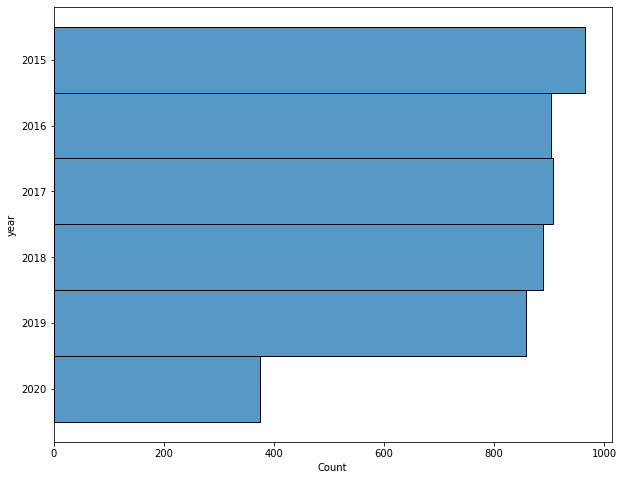

In [33]:
sns.histplot(y=df['year'])

Как мы видим по графику, 2015 год оказался рекордым по числу убийств

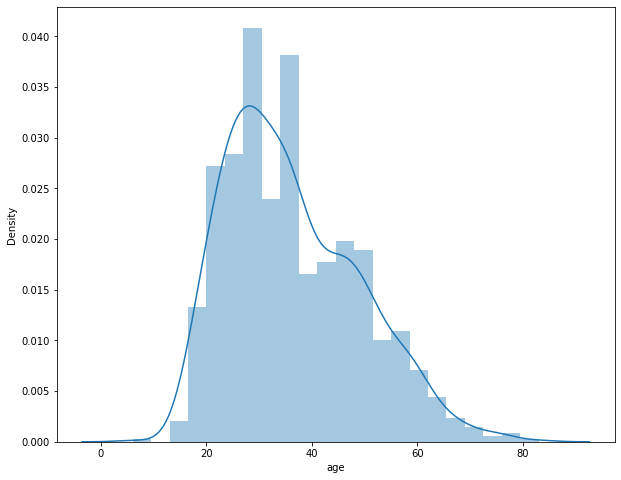

In [34]:
killed_in_2015 = df[df['year']=='2015']
sns.distplot(killed_in_2015['age'])

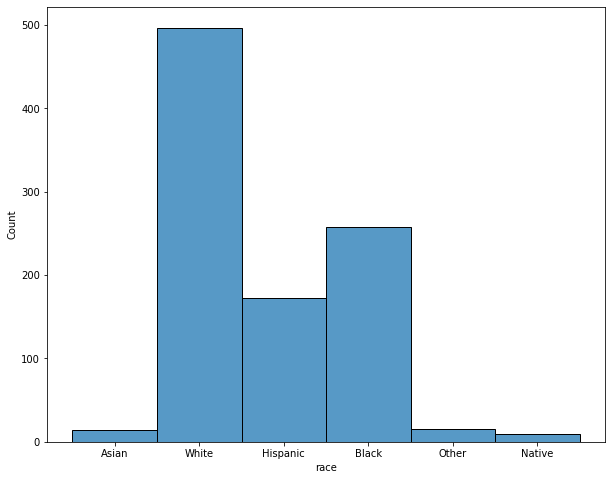

In [37]:
sns.histplot(killed_in_2015['race'])

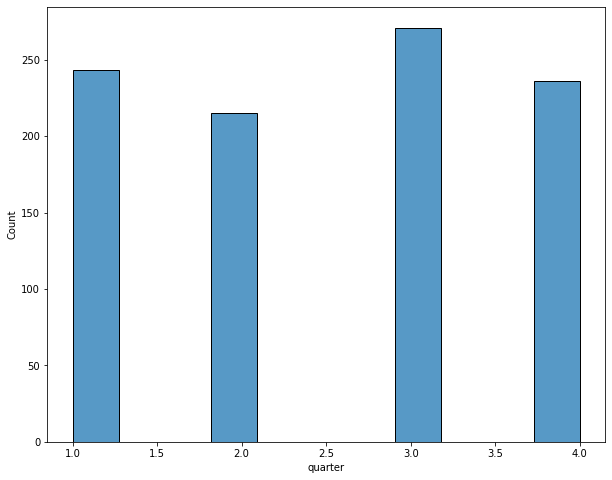

In [39]:
sns.histplot(killed_in_2015['quarter'])

Взглянем на корреляцию признаков

In [42]:
corr_matrix = df.corr()

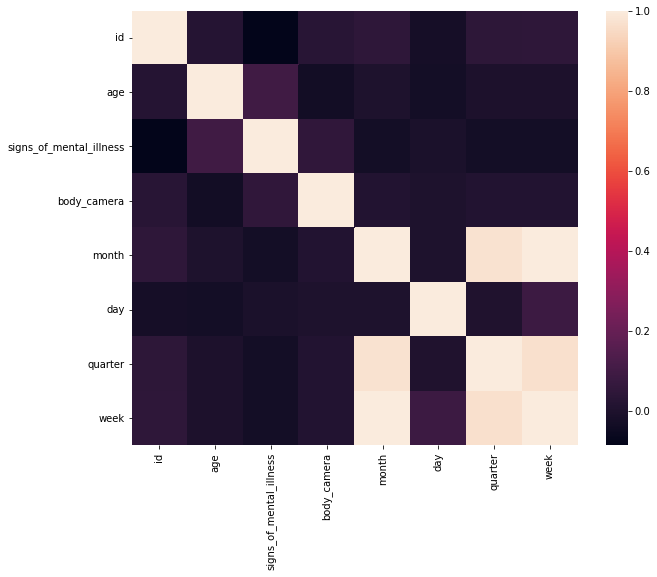

In [43]:
sns.heatmap(corr_matrix);

Матрица корреляция не оказалась полезной для нас, потому что полезные количественные признаки в нашем дата сете отсутствуют

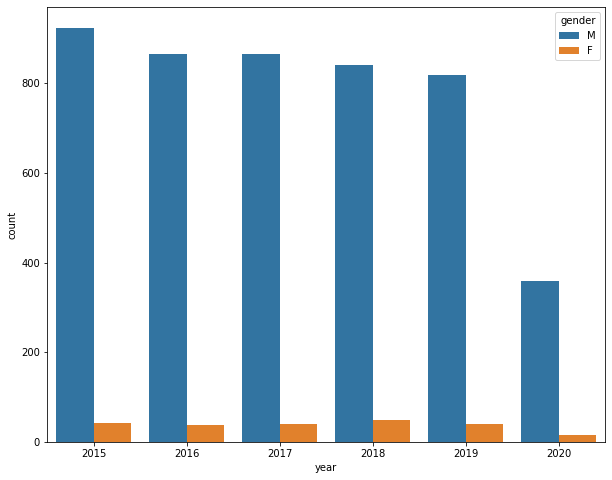

In [50]:
sns.countplot(x="year", hue="gender", data=df);

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       4895 non-null   int64 
 1   name                     4895 non-null   object
 2   date                     4895 non-null   object
 3   manner_of_death          4895 non-null   object
 4   armed                    4895 non-null   object
 5   age                      4895 non-null   int64 
 6   gender                   4895 non-null   object
 7   race                     4895 non-null   object
 8   city                     4895 non-null   object
 9   state                    4895 non-null   object
 10  signs_of_mental_illness  4895 non-null   bool  
 11  threat_level             4895 non-null   object
 12  flee                     4895 non-null   object
 13  body_camera              4895 non-null   bool  
 14  arms_category            4895 non-null  

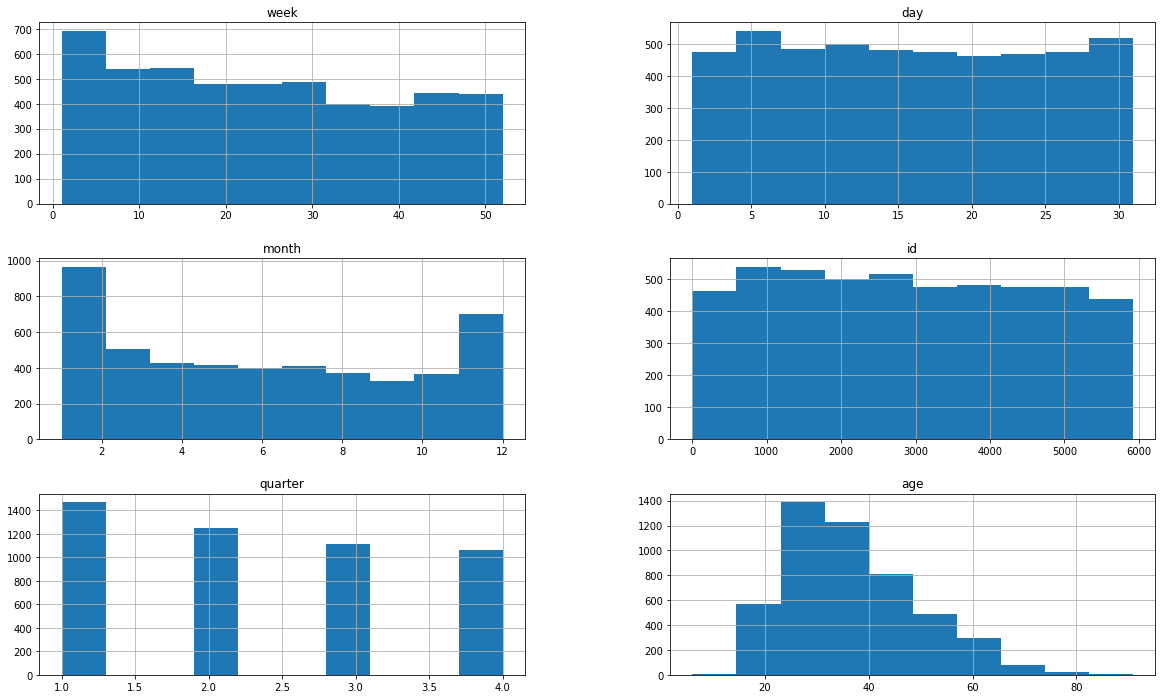

In [56]:
features = list(
    set(df.columns)
  )

df[features].hist(figsize=(20, 12));

In [62]:
pd.crosstab(df["state"], df["race"]).T

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Hawaii,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asian,0,2,0,1,29,5,0,0,1,9,0,0,0,0,1,2,0,1,0,1,3,1,1,0,0,2,0,1,0,1,1,0,2,3,0,0,0,1,1,1,6,0,0,1,9,1,2,4
Black,31,3,17,26,122,18,3,5,111,1,58,30,7,6,15,60,1,47,8,24,10,23,48,0,5,15,0,30,1,46,51,0,56,32,7,42,2,27,0,31,99,7,0,40,21,8,20,84
Hispanic,1,0,83,0,316,48,6,0,51,1,13,4,0,8,3,1,1,3,7,2,3,1,3,0,2,28,0,8,64,8,8,0,1,9,6,6,1,2,0,3,142,12,0,4,21,0,6,16
Native,0,9,13,0,4,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,0,4,1,1,0,0,2,0,0,5,0,7,0,0,0,0,3,0,1,2,1,1,7,0,4,3
Other,0,0,0,0,9,2,0,0,5,15,0,0,0,0,0,0,1,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,3,1,0,1,2,0,0,0
White,63,22,109,46,221,91,11,5,156,3,28,57,24,34,67,39,18,26,17,43,37,36,72,25,16,39,12,21,26,35,88,6,84,100,63,47,1,50,10,89,175,36,7,45,66,37,56,117


In [65]:
df.groupby(["state"])["age"].agg([np.mean]).sort_values(by="mean", ascending=False).T

state,Vermont,Rhode Island,West Virginia,Alabama,New York,New Hampshire,Maine,Arkansas,North Carolina,Kentucky,South Carolina,Indiana,Florida,Oklahoma,Tennessee,Massachusetts,Oregon,Hawaii,Wyoming,New Jersey,Nevada,Michigan,South Dakota,Wisconsin,Nebraska,Virginia,Mississippi,Pennsylvania,Louisiana,Kansas,Washington,Montana,Texas,Colorado,New Mexico,Ohio,Minnesota,Connecticut,Arizona,Missouri,Utah,Maryland,California,Alaska,Illinois,Delaware,Iowa,North Dakota
mean,42.5,41.0,40.934783,40.042105,39.888889,39.583333,39.428571,39.109589,39.067568,38.988506,38.775,38.483516,38.274691,37.966887,37.816,37.757576,37.75,37.689655,37.65625,37.233333,37.211765,37.042254,37.0,36.988636,36.916667,36.75,36.57377,36.431579,36.333333,36.285714,36.174603,35.965517,35.779343,35.64881,35.591398,35.541096,35.466667,35.45,35.400901,35.282258,34.758621,34.74026,34.673324,32.805556,32.565657,31.8,31.419355,31.0


In [66]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [67]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(df.columns.difference(['age','day', 'year', 'month', 'quarter']), 1, inplace=True)

# X["armed"] = X["armed"].map({"Yes": 1, "No": 0})
# X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: ignored